In [149]:
import sys
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

matplotlib.rcParams['text.usetex']    = True
matplotlib.rcParams['font.family']    = 'serif'
matplotlib.rcParams['font.size']      = '16'
matplotlib.rcParams['figure.figsize'] = 6.4, 4.8

In [164]:
APR = h5py.File('../output/APR_Cat_1.4_SFB-a-T73.hdf5','r')
print(APR.keys())

<KeysViewHDF5 ['1s0n_N100', '1s0n_N1000', '1s0n_N10000', '1s0n_N262145', '1s0n_a0', '1s0n_a1', '1s0n_a2', '1s0p_a0', '1s0p_a1', '1s0p_a2', 'E', 'Rnn', 'Rnp', 'Rpp', 'T_interp', 'Tcn_interp', 'Tcp_interp', 'alpha', 'bremsstrahlung_nn_a0', 'bremsstrahlung_nn_a1', 'bremsstrahlung_nn_a2', 'bremsstrahlung_np_a0', 'bremsstrahlung_np_a1', 'bremsstrahlung_np_a2', 'bremsstrahlung_pp_a0', 'bremsstrahlung_pp_a1', 'bremsstrahlung_pp_a2', 'integrand_E', 'integrand_n_0', 'integrand_n_1', 'integrand_n_2', 'integrand_p_0', 'integrand_p_1', 'integrand_p_2', 'integrand_r', 'params', 'r_interp', 'raw_T', 'raw_Tcn', 'raw_Tcp', 'raw_dvdr', 'raw_dvol', 'raw_ephi', 'raw_kfn', 'raw_kfp', 'raw_mstn', 'raw_mstp', 'raw_rT', 'raw_rTc', 'raw_state']>


In [165]:
params = APR['params'][:]
E = APR['E'][:]
alpha = APR['alpha'][:]
spec_1s0n_N100 = APR['1s0n_N100'][:]
spec_1s0n_N1000 = APR['1s0n_N1000'][:]
spec_1s0n_N10000 = APR['1s0n_N10000'][:]
spec_1s0n_N262145 = APR['1s0n_N262145'][:]

raw_rT = APR['raw_rT'][:]
raw_T = APR['raw_T'][:]
raw_ephi = APR['raw_ephi'][:]
raw_dvol = APR['raw_dvol'][:]
raw_dvdr = APR['raw_dvdr'][:]

raw_rTc = APR['raw_rTc'][:]
raw_Tcn = APR['raw_Tcn'][:]
raw_Tcp = APR['raw_Tcp'][:]
raw_kfn = APR['raw_kfn'][:]
raw_kfp = APR['raw_kfp'][:]
raw_mstn = APR['raw_mstn'][:]
raw_mstp = APR['raw_mstp'][:]
raw_state = APR['raw_state'][:]

r_interp = APR['r_interp'][:]
Tcn_interp = APR['Tcn_interp'][:]
T_interp = APR['T_interp'][:]
Rnn = APR['Rnn'][:]
Rnp = APR['Rnp'][:]
Rpp = APR['Rpp'][:]

integrand_r = APR['integrand_r'][:]
integrand_E = APR['integrand_E'][:]
integrand_n = []
integrand_p = []
for i in range(len(integrand_E)):
    integrand_n.append( APR['integrand_n_'+str(i)][:] )
    integrand_p.append( APR['integrand_p_'+str(i)][:] )
    
pbf_1s0n = np.zeros((len(alpha), len(E)))
pbf_1s0p = np.zeros((len(alpha), len(E)))
bremsstrahlung_nn = np.zeros((len(alpha), len(E)))
bremsstrahlung_np = np.zeros((len(alpha), len(E)))
bremsstrahlung_pp = np.zeros((len(alpha), len(E)))

for i in range(len(alpha)):
    pbf_1s0n[i] = APR['1s0n_a'+str(i)][:]
    pbf_1s0p[i] = APR['1s0p_a'+str(i)][:]
    bremsstrahlung_nn[i] = APR['bremsstrahlung_nn_a'+str(i)][:]
    bremsstrahlung_np[i] = APR['bremsstrahlung_np_a'+str(i)][:]
    bremsstrahlung_pp[i] = APR['bremsstrahlung_pp_a'+str(i)][:]

Text(0, 0.5, '$m^*$')

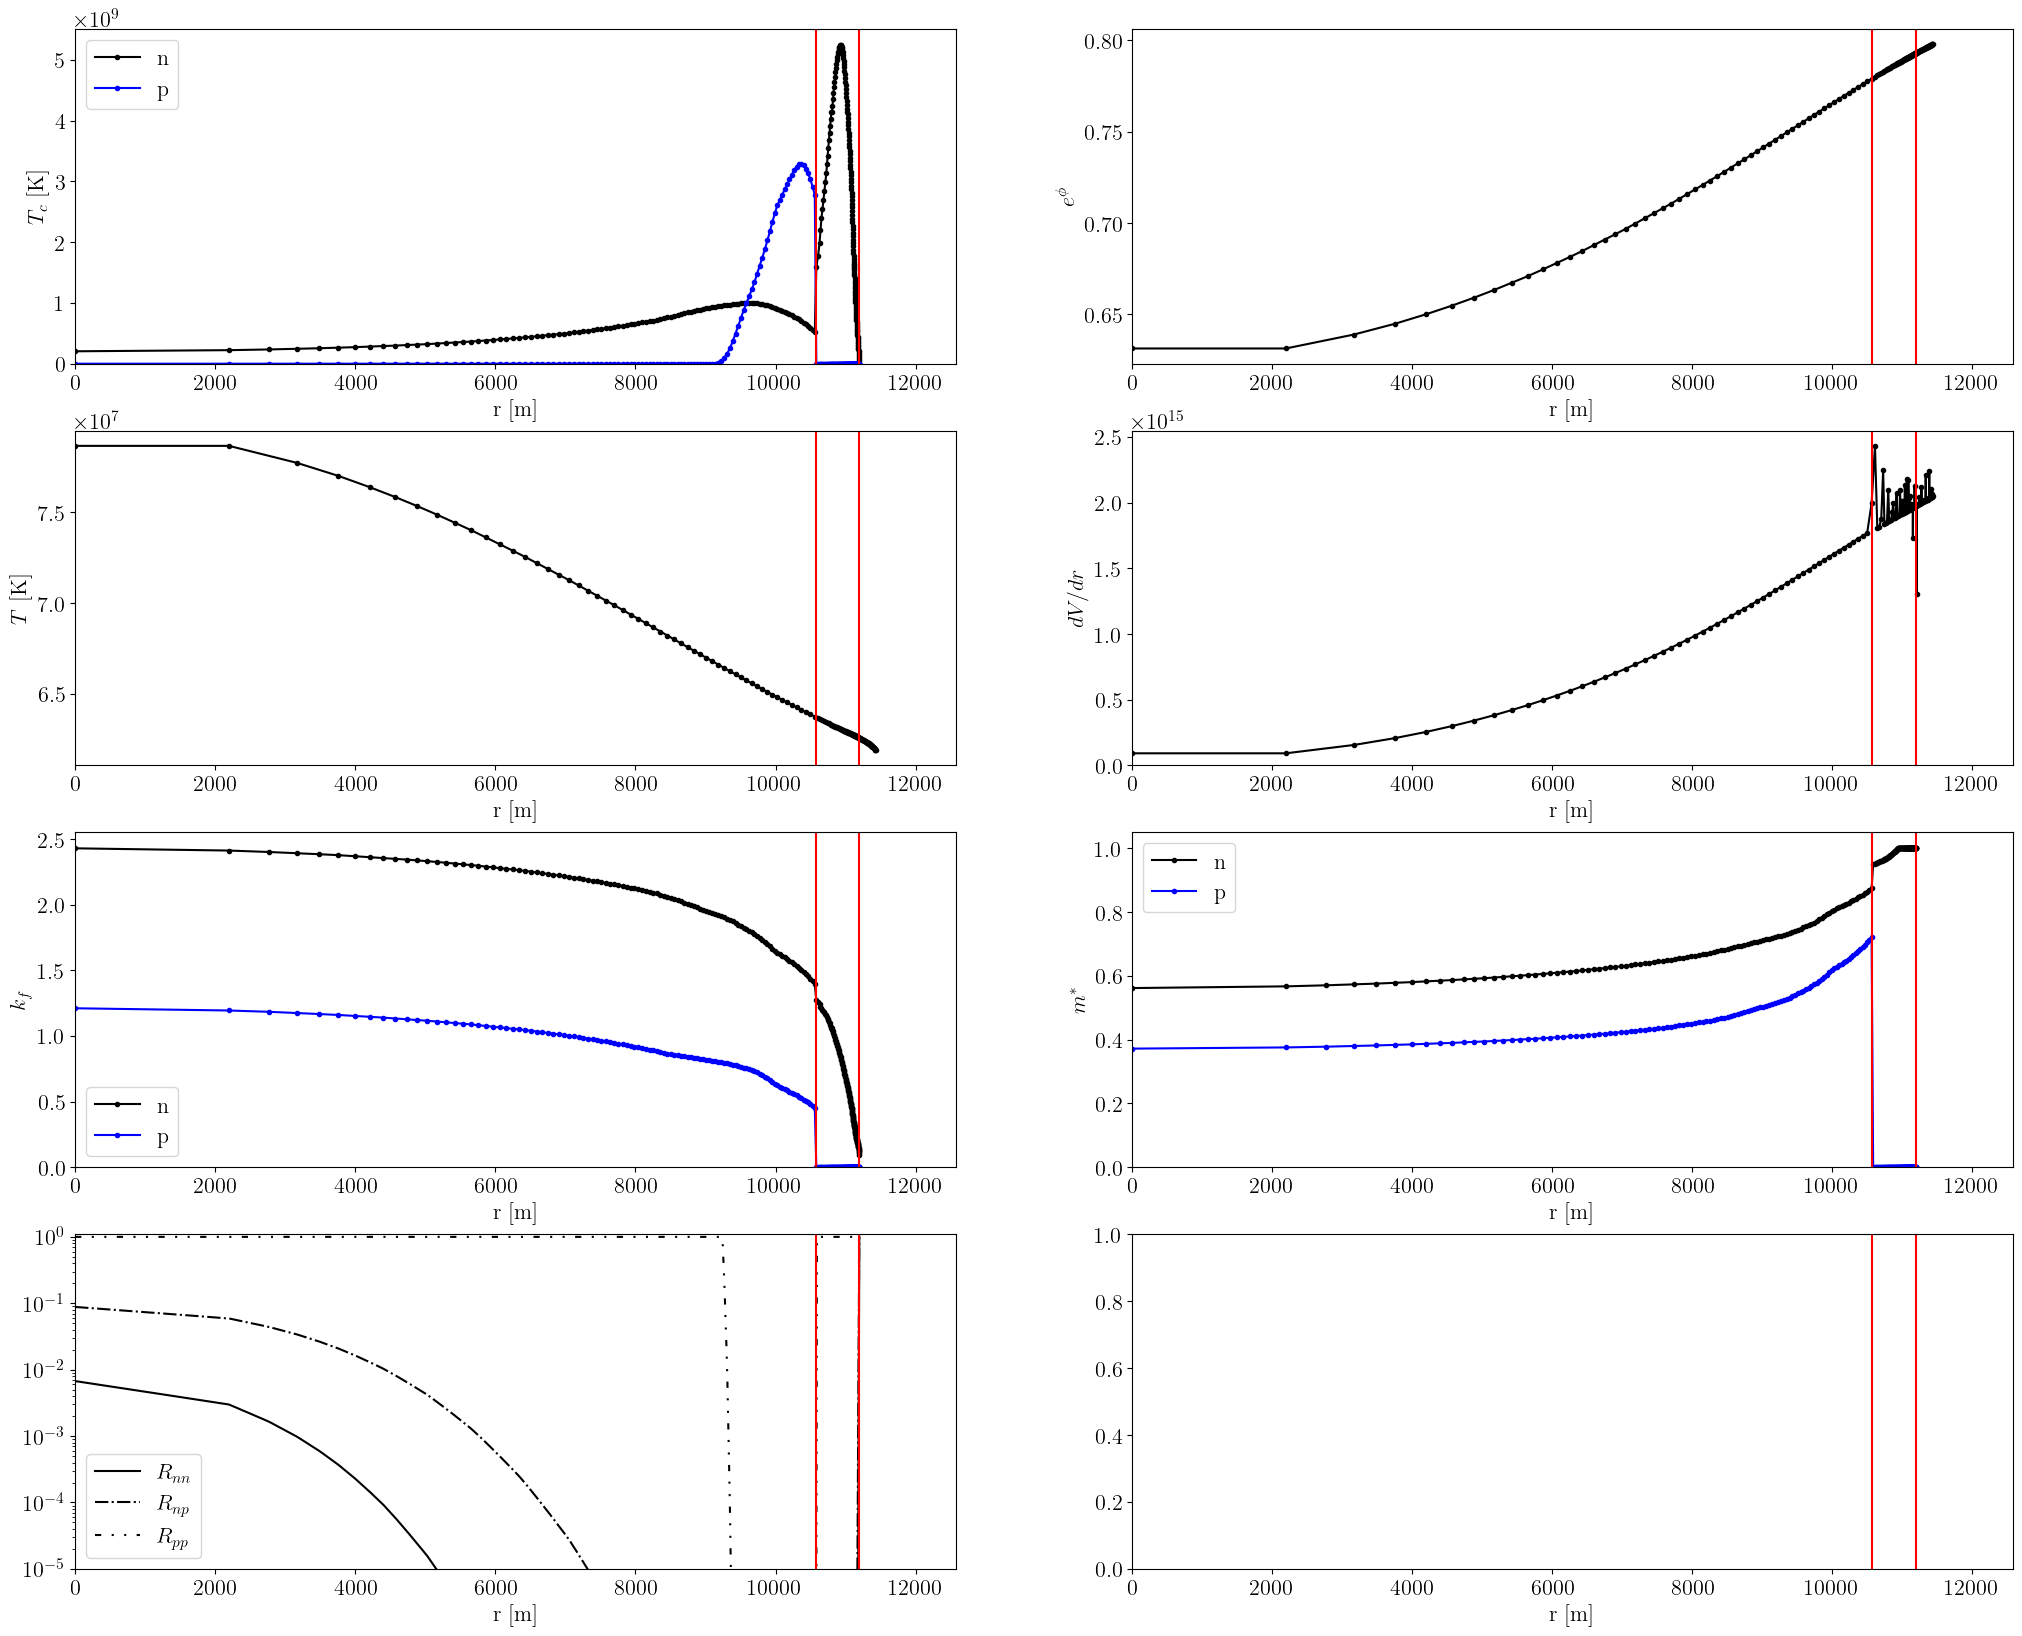

In [152]:
fig, ax = plt.subplots(figsize=(25,20), nrows=4, ncols=2)

ax[0,0].plot(raw_rTc, raw_Tcn, marker='.', label='n', color='black')
#ax[0,0].plot(r_interp, Tcn_interp, marker='', color='orange')
ax[0,0].plot(raw_rTc, raw_Tcp, marker='.', label='p', color='blue')
ax[0,0].legend()

ax[1,0].plot(raw_rT, raw_T, marker='.', color='black')
#ax[1,0].plot(r_interp, T_interp, marker='', color='orange')

ax[0,1].plot(raw_rT, raw_ephi, marker='.', color='black')

ax[1,1].plot(raw_rT, raw_dvdr, marker='.', color='black')

ax[2,0].plot(raw_rTc, raw_kfn, marker='.', color='black', label='n')
ax[2,0].plot(raw_rTc, raw_kfp, marker='.', color='blue', label='p')
ax[2,0].legend()

ax[2,1].plot(raw_rTc, raw_mstn, marker='.', color='black', label='n')
ax[2,1].plot(raw_rTc, raw_mstp, marker='.', color='blue', label='p')
ax[2,1].legend()

ax[3,0].plot(r_interp, Rnn, marker='', color='black', label=r'$R_{nn}$', linestyle='-')
ax[3,0].plot(r_interp, Rnp, marker='', color='black', label=r'$R_{np}$', linestyle='-.')
ax[3,0].plot(r_interp, Rpp, marker='', color='black', label=r'$R_{pp}$', linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_ylim(1e-5,1.1)

for i in [0,1,2,3]:
    for j in [0,1]:
        ax[i,j].set_xlim(0, np.max(raw_rT)*1.1)
        ax[i,j].set_xlabel(r'r [m]')
        ax[i,j].axvline(params[0], color='red')
        ax[i,j].axvline(params[1], color='red')
        
ax[0,0].set_ylim(0,)
ax[1,1].set_ylim(0,)
ax[2,0].set_ylim(0,)
ax[2,1].set_ylim(0,)
ax[0,0].set_ylabel(r'$T_c$ [K]')
ax[1,0].set_ylabel(r'$T$ [K]')
ax[0,1].set_ylabel(r'$e^{\phi}$')
ax[1,1].set_ylabel(r'$dV/dr$')
ax[2,0].set_ylabel(r'$k_f$')
ax[2,1].set_ylabel(r'$m^*$')

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

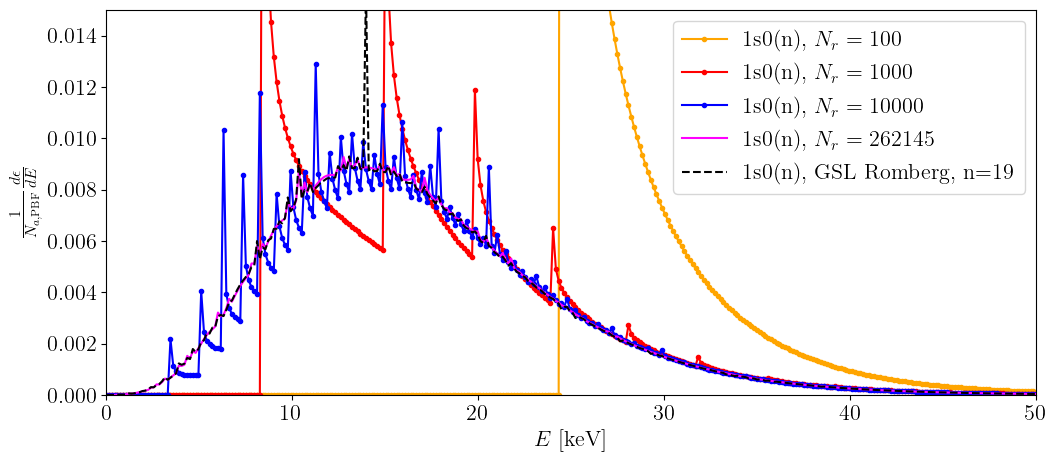

In [154]:
loc = np.where(alpha==1)[0][0]

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(E, spec_1s0n_N100/np.sum(spec_1s0n_N100), marker='.', label=r'1s0(n), $N_r=100$', color='orange')
ax.plot(E, spec_1s0n_N1000/np.sum(spec_1s0n_N1000), marker='.', label='1s0(n), $N_r=1000$', color='red')
ax.plot(E, spec_1s0n_N10000/np.sum(spec_1s0n_N10000), marker='.', label='1s0(n), $N_r=10000$', color='blue')
ax.plot(E, spec_1s0n_N262145/np.sum(spec_1s0n_N262145), marker='', label='1s0(n), $N_r=262145$', color='magenta')

ax.plot(E, pbf_1s0n[loc,:]/np.sum(pbf_1s0n[loc,:]), marker='', label='1s0(n), GSL Romberg, n=19', color='black', linestyle='--')
plt.legend()
plt.ylim(0, 0.015)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.yscale('log')
#plt.ylim(1e-18,)

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

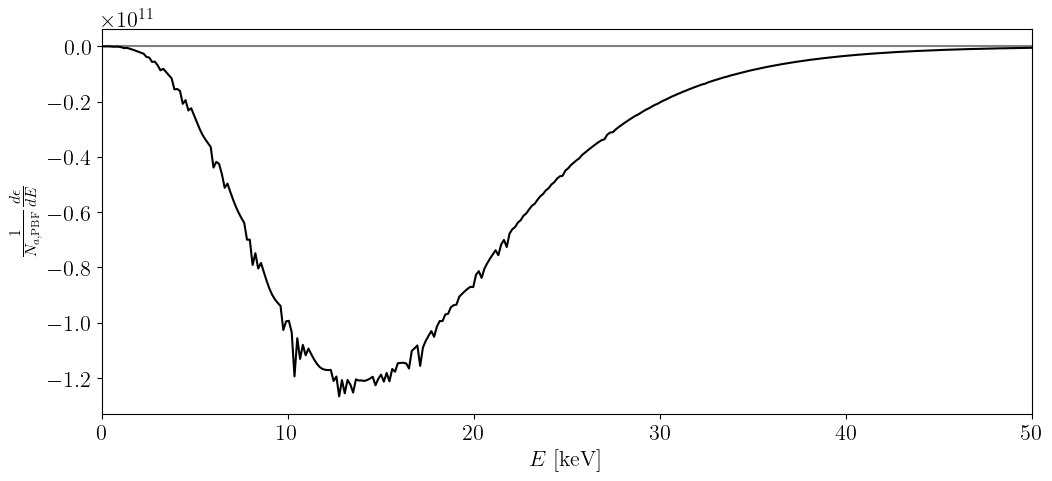

In [155]:
fig, ax = plt.subplots(figsize=(12,5))
plt.axhline(0, color='gray')
ax.plot(E, pbf_1s0n[loc,:] - spec_1s0n_N262145, marker='', label='difference', color='black')
#plt.ylim(0,6e-5)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

In [140]:
K2keV = 8.61833e-8

def dFdE(E, T):
    z = E/T
    return 315./(124*np.pi**6)/T*z**3*(z**2 + 4*np.pi**2)/(np.exp(z)-1)

In [141]:
np.sum(bremsstrahlung_nn[0])/np.sum(bremsstrahlung_np[0]),np.sum(bremsstrahlung_pp[0])/np.sum(bremsstrahlung_np[0])

(0.0007770642343014563, 3.6430077684208555e-05)

In [169]:
np.sum(pbf_1s0n[2])/np.sum(bremsstrahlung_np[2]), np.sum(pbf_1s0p[2])/np.sum(bremsstrahlung_np[2])

(4.881197645451047e-08, 7.219405721162341e-08)

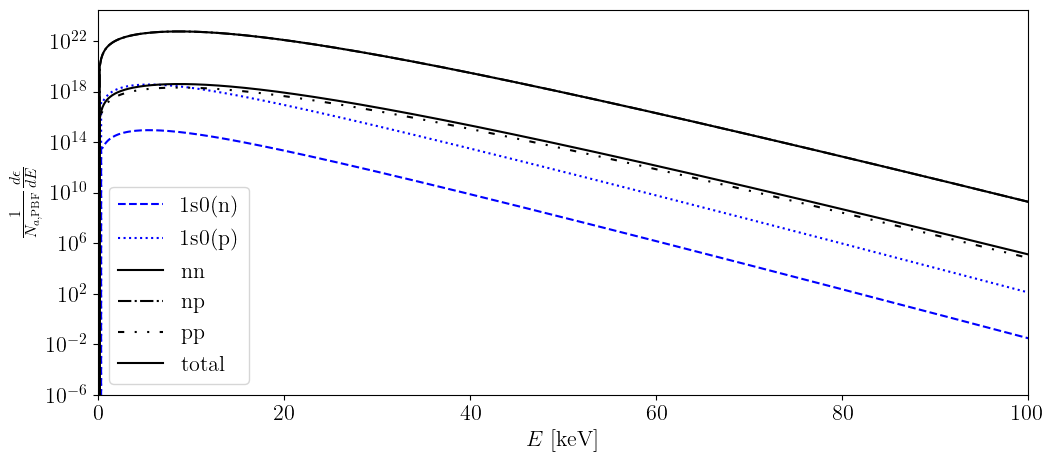

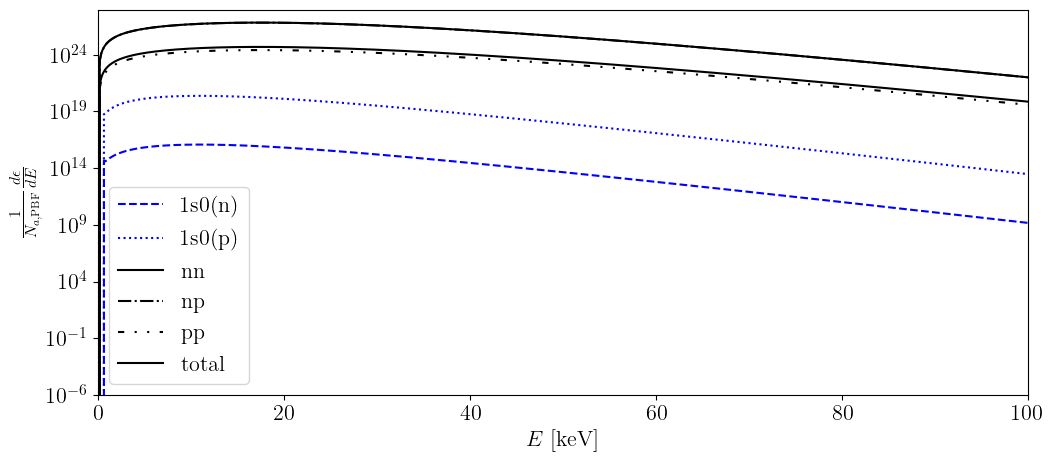

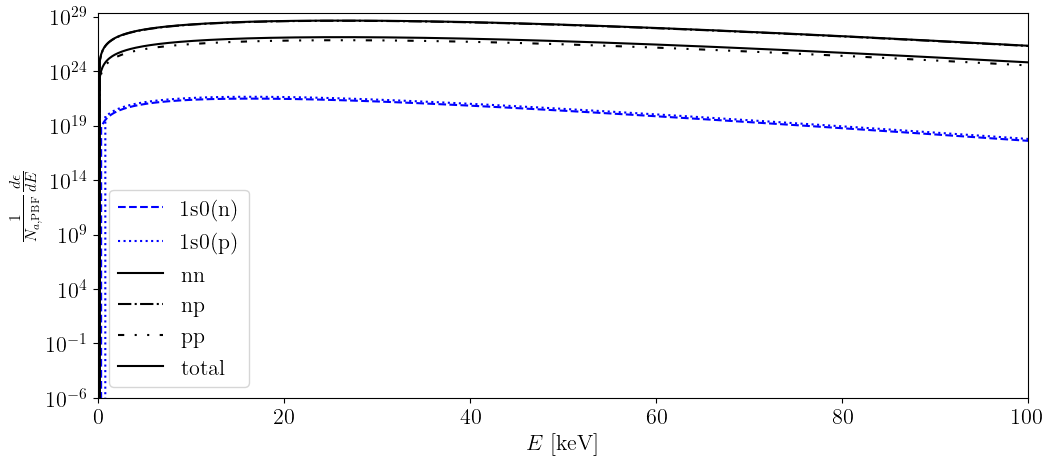

In [171]:
for i in range(len(alpha)):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(E, pbf_1s0n[i], marker='', label='1s0(n)', color='blue', linestyle='--')
    ax.plot(E, pbf_1s0p[i], marker='', label='1s0(p)', color='blue', linestyle=':')
    ax.plot(E, bremsstrahlung_nn[i], marker='', label='nn', color='black', linestyle='-')
    ax.plot(E, bremsstrahlung_np[i], marker='', label='np', color='black', linestyle='-.')
    ax.plot(E, bremsstrahlung_pp[i], marker='', label='pp', color='black', linestyle=(0, (3, 5, 1, 5, 1, 5)))
    ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i], marker='', label='total', color='black', linestyle='-')
    #plt.plot(E, dFdE(E, params[2] * K2keV/1.31), label='thermal (old paper)', color='blue', linestyle=':')
    #plt.plot(E, dFdE(E, params[2] * K2keV * alpha[i]) * 3.2e20, label='bremsstrahlung (old paper)', color='blue', linestyle=':')

    plt.legend()
    plt.xlim(np.min(E), 100)
    plt.xlabel(r'$E$ [keV]')
    plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

    #plt.ylim(0,)
    plt.yscale('log')
    plt.ylim(1e-6,)

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

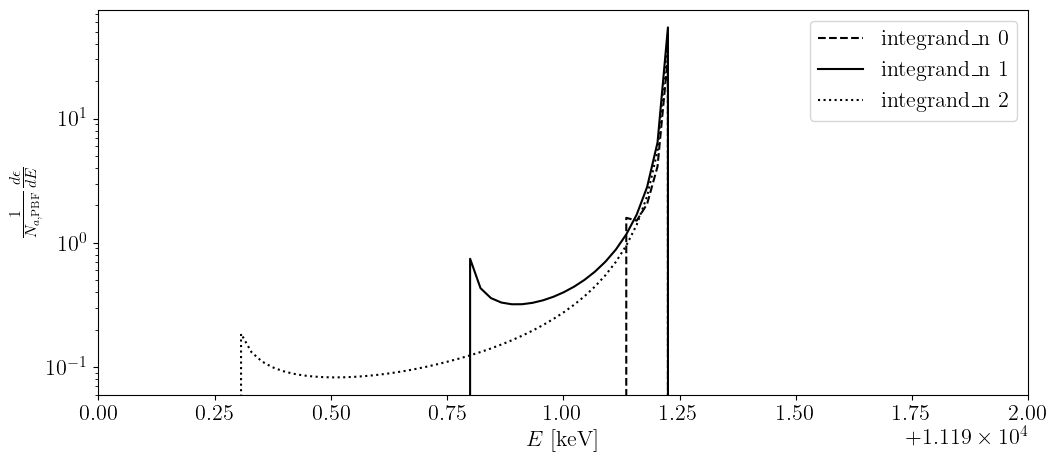

In [85]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(integrand_r, integrand_n[0], marker='', label='integrand_n 0', color='black', linestyle='--')
ax.plot(integrand_r, integrand_n[1], marker='', label='integrand_n 1', color='black', linestyle='-')
ax.plot(integrand_r, integrand_n[2], marker='', label='integrand_n 2', color='black', linestyle=':')
plt.legend()
#plt.xlim(9240,9242)

plt.xlim(11190, 11192)
#plt.ylim(0,8)
plt.yscale('log')

plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.ylim(0,0.06)
#plt.yscale('log')
#plt.ylim(1e-6,)

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

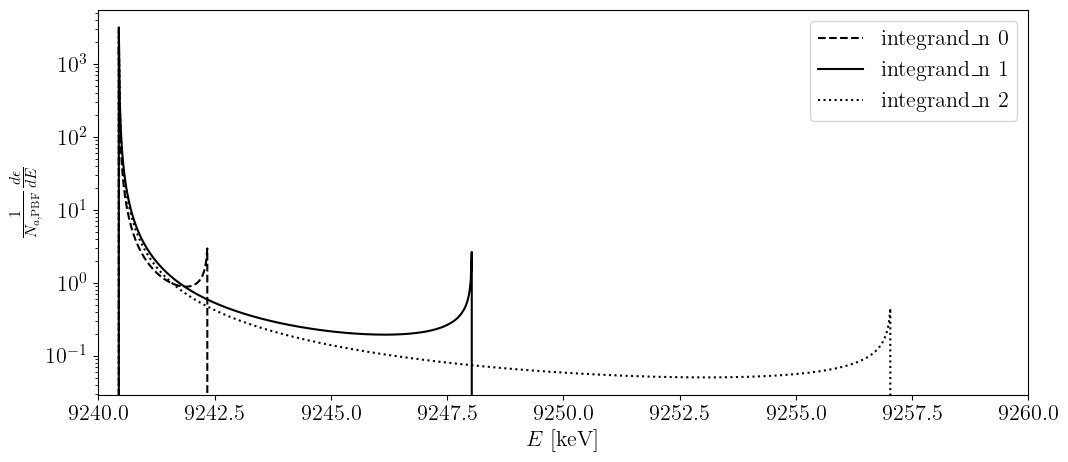

In [74]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(integrand_r, integrand_p[0], marker='', label='integrand_n 0', color='black', linestyle='--')
ax.plot(integrand_r, integrand_p[1], marker='', label='integrand_n 1', color='black', linestyle='-')
ax.plot(integrand_r, integrand_p[2], marker='', label='integrand_n 2', color='black', linestyle=':')
plt.legend()
#plt.xlim(9240,9242)

plt.xlim(9240, 9260)
#plt.ylim(0,8)
plt.yscale('log')

plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.ylim(0,0.06)
#plt.yscale('log')
#plt.ylim(1e-6,)

In [75]:
print(np.min(integrand_r[np.where(integrand_p[0] > 0)]), np.max(integrand_r[np.where(integrand_p[0] > 0)])) 
print(np.min(integrand_r[np.where(integrand_p[1] > 0)]), np.max(integrand_r[np.where(integrand_p[1] > 0)])) 
print(np.min(integrand_r[np.where(integrand_p[2] > 0)]), np.max(integrand_r[np.where(integrand_p[2] > 0)])) 

9240.43997607987 10581.639598479102
9240.43997607987 10581.639598479102
9240.43997607987 10581.639598479102


In [ ]:
print(np.min(integrand_r[np.where(integrand_n[0] > 0)]), np.max(integrand_r[np.where(integrand_n[0] > 0)])) 
print(np.min(integrand_r[np.where(integrand_n[1] > 0)]), np.max(integrand_r[np.where(integrand_n[1] > 0)])) 
print(np.min(integrand_r[np.where(integrand_n[2] > 0)]), np.max(integrand_r[np.where(integrand_n[2] > 0)])) 

In [ ]:
np.sum(dFdE(E[1:], params[2] * K2keV/1.31)) - np.sum(spec_1s0p_gsl)

In [ ]:
n = np.array([1.78268, 3.12285, 2.77691])
p = np.array([26.7282, 47.1823, 40.9827])

In [ ]:
print(n/np.sum(n))

In [ ]:
print(p/np.sum(p))

In [ ]:
K2keV = 8.61833e-8

def dFdE(E, T):
    z = E/T
    #print(E,T,z)
    return 315./(125*np.pi**6)/T*z**3*(z**2 + 4*np.pi**2)/(np.exp(z)-1)
         
plt.plot(E[10:], dFdE(E[10:], 5.))
plt.legend()
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
#plt.xscale('log')
#plt.yscale('log')

In [ ]:
1e9 * 0.64 * 8.61833e-8